<a href="https://colab.research.google.com/github/IamHassanAb/WebScraping-Reddit-old-Python/blob/main/WebScrapping(reddit)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [3]:
import requests
import csv
import time
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###The Real Project

In [4]:
url = "https://old.reddit.com/r/webdev/"
# Headers to mimic a browser visit
headers = {'User-Agent': 'Mozilla/5.0'}

# Returns a requests.models.Response object
page_html = requests.get(url, headers=headers)

In [ ]:
page_soup = soup(page_html.content, 'html.parser')
page_soup

In [6]:
# domains = page_soup.find_all("span", class_="domain")
# for domain in domains:
#   if domain.text != '(self.webdev)':
#     continue
#   print(domain.text)

In [7]:
# #iterating through the list of domains obtained

# for domain in domains:
#   if domain.text != '(self.webdev)':
#     continue
#   parent_div = domain.parent.parent.parent.parent
#   print(parent_div.text)

In [8]:
counter = 1
att = {'class': 'thing', 'data-domain': 'self.webdev'}
posts = page_soup.find_all('div', attrs=att)
while (counter <= 100):
  for post in posts:
    title = post.find('p', class_="title").text
    author = post.find('a', class_='author').text
    likes = post.find("div", attrs={"class": "score likes"}).text
    comments = post.find('a', class_='comments').text.split()[0]
    if comments == 'comment':
      comments = 0
    if likes == "•":
      likes = "None"
    post_line = [counter, title, author, likes, comments]
    with open('output.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(post_line)
    
    counter += 1

  next_button = page_soup.find("span", class_="next-button")
  next_page_link = next_button.find("a").attrs['href']
  time.sleep(2)
  page_html = requests.get(next_page_link, headers=headers)
  page_soup = soup(page_html.content, 'html.parser')
  posts = page_soup.find_all('div', attrs=att)

###Data Analysis

In [9]:
path = '/content/output.csv'
df = pd.read_csv(path)
df.head(10)
df = df.drop_duplicates(keep='last')
df[df.duplicated()]

,1,Monthly Getting Started / Web Dev Career ThreadMonthly Career Thread (self.webdev),AutoModerator,79,270


In [10]:
df = df.drop(columns=['1'])

In [11]:
col_names = ['Title', 'Author', 'Likes', 'Comments']
df.columns = col_names
df

,Title,Author,Likes,Comments
0,Monthly Getting Started / Web Dev Career Threa...,AutoModerator,5,9
1,Web Development is so forgiving (self.webdev),PepeKepler,535,84
2,Is PHP outdated?Discussion (self.webdev),The_Callattar,409,648
3,How does figma help developers?Question (self....,quarius12,23,20
4,What are the benefits of using Prisma over Mon...,lumenwrites,3,1
...,...,...,...,...
104,Are there any communities/subreddits to get he...,ReasonCharacter2052,1,4
105,Most popular backend frameworksQuestion (self....,melvingm101,4,17
106,Does the user see the curl request I made in p...,bububeti,6,7
107,"Why am I getting this ""linting"" warning from t...",Taro_Naza,1,12


In [12]:
df[:10]

,Title,Author,Likes,Comments
0,Monthly Getting Started / Web Dev Career Threa...,AutoModerator,5,9
1,Web Development is so forgiving (self.webdev),PepeKepler,535,84
2,Is PHP outdated?Discussion (self.webdev),The_Callattar,409,648
3,How does figma help developers?Question (self....,quarius12,23,20
4,What are the benefits of using Prisma over Mon...,lumenwrites,3,1
5,Webdev communities to follow?Question (self.we...,el_diego,5,0
6,"A little lost in how to link Next, Apollo Serv...",werdnaegni,4,4
7,Trying to run external code via html in a site...,JamesTDG,None,2
8,Advice for a beginner:) (self.webdev),alexebmeier,3,1
9,GET vs POSTQuestion (self.webdev),Lightisicus,3,7


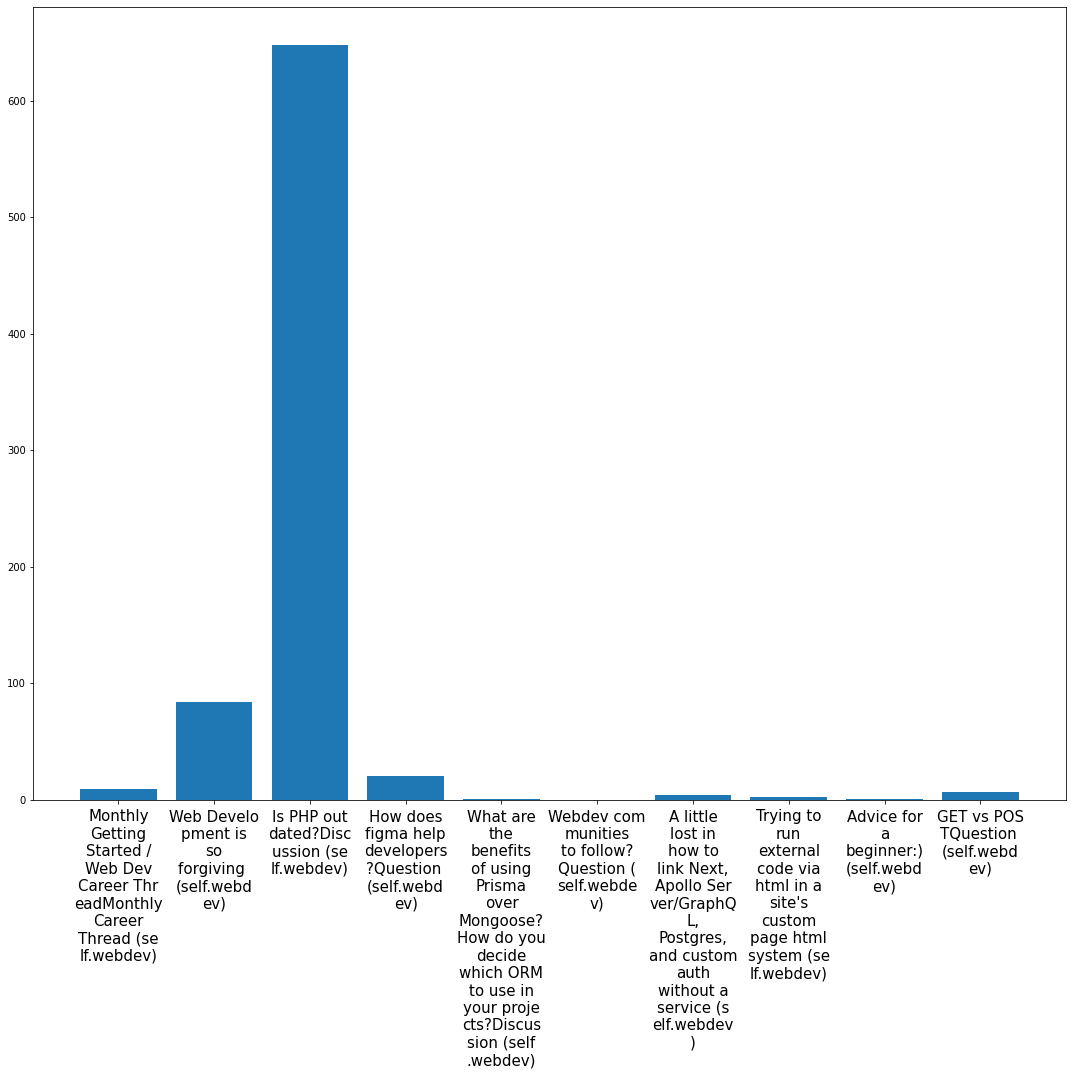

In [38]:
plt.subplots(figsize=(15,15))
plt.bar(df[:10]['Title'],df[:10]['Comments'])
labels = df[:10]['Title'].tolist()
plt.xticks(range(10),[textwrap.fill(label, 10) for label in labels], fontsize=15, horizontalalignment="center")
plt.tight_layout()
plt.tick_params(axis='x', pad=6) 